# HS-Blast, Megablast and CLAST comparsion


The specificiations of software and hardware are below. All software was ran on those specifications.

## Software specifications

All test were done running the following programs (found below). Operation system Ubuntu 14.04 LTS 64 bit.

  Software  | Version | Link
  ------------- | -------------
  Ubuntu 64 bit | 14.04 LTS | http://www.ubuntu.com/
  blast+ local | 2.3.0+ | https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastDocs&DOC_TYPE=Download
  hs-blastn | 0.0.4+ | https://github.com/chenying2016/queries
  CLAST | 0.1.5 | https://github.com/masayano/CLAST
  

## Hardware specifications

All tests and results were gain on PC with the specifications listed below.

  Hardware  | Specification
  ------------- | -------------
  CPU  | Intel(R) Core(TM) i5-4690K CPU @ 3.50 GHz
  Graphics card  | EVGA GeForce GTX 760
  Memory  | DDR3 8GB 1600 MHz
  HDD| Segagate 3 SATA TB/TO, 64MB Cache, 7200 RPM
  
  
  Graphic card details  | Specification
  ------------- | -------------
  CUDA cores  | 1152
  Base Clock  | 980 MHz
  Boost Clock  | 1033 MHz
  Memory  | 2048 MB GDDR5
  Memory Clock  | 6008 MHz
  Memory Bandwitch  | 192.2GB/s
  
  Hardware  | Cost (Amazon.com)
  ------------- | -------------
  Graphic card  | \$189.99
  CPU  | \$234.46 

## Sequances used in the result gathering

Alias for each sequance is writting because later in the graphs sometimes instead of a full name the alias is used. Artificial genomes were created with a scriptt written in C++ with a equal chance of generating a nucletoide for every four possibilities for a set length.

The Escherichia coli 100 strins is a sequence collection made out of 100 E. coli strains (complete genomes) found on the NCBI.

  Sequance  | NCBI number | Alias | Length [bp] | Size [MB] | Link 
  ------------- | -------------
  Canarypox virus, complete genome | NC_005309.1 | CV | 359,853 | 0.3651 | http://www.ncbi.nlm.nih.gov/nuccore/40555938/
  Sulfolobus islandicus LAL14/1, complete genome | CP003928.1 | Sh | 2,465,177 | 2,5 | http://www.ncbi.nlm.nih.gov/nuccore/CP003928.1
  Escherichia coli O157:H7 str. Sakai DNA, complete genome | BA000007.2 | Sh | 5,498,450 | 5,6 | http://www.ncbi.nlm.nih.gov/nuccore/BA000007.2
  Opitutaceae bacterium TAV5, complete genome | CP007053.1 | O | 7,317,842 | 7,4 | http://www.ncbi.nlm.nih.gov/nuccore/CP007053.1
  Artificial genome 1 | none | AG1 | 10,000,000 | 10,1 | none
  Artificial genome 2 | none | AG2 | 15,000,000 | 15,5 | none
  Artificial genome 3 | none | AG3 | 20,000,000 | 20,3 | none
  Artificial genome 4 | none | AG4 | 50,000,000 | 50,6 | none
  Artificial genome 5 | none | AG5 | 100,000,000 | 101,3 | none
  Artificial genome 6 | none | AG6 | 500,000,000 | 506,3 | none
  Artificial genome 7 | none | AG7 | 1000,000,000 | 1001,3 | none
  Escherichia coli 100 strains | none | eColiStrains | 100 x eColi | 498,2 | from NCBI

## Initialise the libs

In [209]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

## Load the results

In [210]:
# HS-Blastn data
hs_blastn_index = pa.read_csv("hsblastn/hsIndex.csv")
hsPivot = pa.read_csv('hsblastn/hsIndexPivot.csv')

# Single query for HS-blastn
hsThread1 = pa.read_csv('hsblastn/hsblastnThread1.csv')
hsThread2 = pa.read_csv('hsblastn/hsblastnThread2.csv')
hsThread3 = pa.read_csv('hsblastn/hsblastnThread3.csv')
hsThread4 = pa.read_csv('hsblastn/hsblastnThread4.csv')

# Multiple queries for HS-Blastn
multiQ_q5_t1 = pa.read_csv('hsblastn/hsBlastn_5q_1t.csv')
multiQ_q5_t4 = pa.read_csv('hsblastn/hsBlastn_5q_4t.csv')
multiQ_q25_t1 = pa.read_csv('hsblastn/hsBlastn_25q_1t.csv')
multiQ_q25_t4 = pa.read_csv('hsblastn/hsBlastn_25q_4t.csv')

# E. coli strains for HS-Blastn
strains = pa.read_csv('hsblastn/eColiStrainsHSblastn.csv')

# Multiple queries for Megablast
mb_q5_t1 = pa.read_csv('megablast/mb_q5_t1.csv')
mb_q5_t4 = pa.read_csv('megablast/mb_q5_t4.csv')
mb_q25_t1 = pa.read_csv('megablast/mb_q25_t1.csv')
mb_q25_t4 = pa.read_csv('megablast/mb_q25_t4.csv')

# Megablast data
mbIndex = pa.read_csv('megablast/mbIndex.csv')

## Data exploration / example

In [211]:
# Plot inside the notebook
%matplotlib inline
hs_blastn_index.head()

,Sequence,Nucleotide number,Packing db,BWT,Fasta table,SA,Time,NCBI,MB seq size,id
0,"Canarypox virus, complete genome",359853,0.002963,0.174373,1.283210,0.070890,3.685100,NC_005309.1,0.3651,0
1,"Canarypox virus, complete genome",359853,0.008976,0.230844,1.268486,0.284158,3.504893,NC_005309.1,0.3651,0
2,"Canarypox virus, complete genome",359853,0.004518,0.175551,1.291483,0.100373,3.276412,NC_005309.1,0.3651,0
3,"Canarypox virus, complete genome",359853,0.007369,0.203736,1.286997,0.143967,3.359456,NC_005309.1,0.3651,0
4,"Canarypox virus, complete genome",359853,0.003062,0.173673,1.282894,0.114630,3.521501,NC_005309.1,0.3651,0


In [212]:
print (hs_blastn_index.columns)
print (hsThread2.columns)

Index(['Sequence', 'Nucleotide number', 'Packing db', 'BWT', 'Fasta table',
       'SA', 'Time', 'NCBI', 'MB seq size', 'id'],
      dtype='object')
Index(['preprocessing time', 'sequence', 'query length', 'query numeration',
       'query time'],
      dtype='object')


## Create mean from multiple results

In [213]:
# HS-Blast calculating average results
meansIndex = hs_blastn_index.groupby(['Sequence']).mean().reset_index()
meanQueryThread1 = hsThread1.groupby(['sequence','query length']).mean().reset_index()
meanQueryThread2 = hsThread2.groupby(['sequence','query length']).mean().reset_index()
meanQueryThread3 = hsThread3.groupby(['sequence','query length']).mean().reset_index()
meanQueryThread4 = hsThread4.groupby(['sequence','query length']).mean().reset_index()

# Megablast calculating average results
mbIndexMeans = mbIndex.groupby(['Sequence']).mean().reset_index()

meanQueryThread1.head()

,sequence,query length,preprocessing time,query time
0,AG1,1000,0.090,0.00190
1,AG1,10000,0.090,0.00750
2,AG1,100000,0.124,0.05088
3,AG2,1000,0.090,0.00192
4,AG2,10000,0.090,0.01432


In [214]:
# multiple queries for HS-Blastn results
multiQ_q5_t1_means = multiQ_q5_t1.groupby(['sequence','query length']).mean().reset_index()
multiQ_q5_t4_means = multiQ_q5_t4.groupby(['sequence','query length']).mean().reset_index()
multiQ_q25_t1_means = multiQ_q25_t1.groupby(['sequence','query length']).mean().reset_index()
multiQ_q25_t4_means = multiQ_q25_t4.groupby(['sequence','query length']).mean().reset_index()

# multipe queries for Megablast results
mb_q5_t1_means = mb_q5_t1.groupby(['sequence','query length']).mean().reset_index()
mb_q5_t4_means = mb_q5_t4.groupby(['sequence','query length']).mean().reset_index()
mb_q25_t1_means = mb_q25_t1.groupby(['sequence','query length']).mean().reset_index()
mb_q25_t4_means = mb_q25_t4.groupby(['sequence','query length']).mean().reset_index()


# E. coli strains for HS-Blastn results
strainMeans = strains.groupby(['query count','threads']).mean().reset_index()

multiQ_q5_t1_means.head()

,sequence,query length,preprocessing time,query time
0,AG1,1000,0.090,0.00286
1,AG1,10000,0.090,0.02546
2,AG1,100000,0.448,0.24992
3,AG2,1000,0.090,0.00482
4,AG2,10000,0.090,0.04646


In [215]:
# Add total time to query search for single query files
meanQueryThread1['total']=meanQueryThread1['preprocessing time']+meanQueryThread1['query time']
meanQueryThread2['total']=meanQueryThread2['preprocessing time']+meanQueryThread2['query time']
meanQueryThread3['total']=meanQueryThread3['preprocessing time']+meanQueryThread3['query time']
meanQueryThread4['total']=meanQueryThread4['preprocessing time']+meanQueryThread4['query time']

# Add total time to query search for single multiple query files
multiQ_q5_t1_means['total']=multiQ_q5_t1_means['preprocessing time']+multiQ_q5_t1_means['query time']
multiQ_q5_t4_means['total']=multiQ_q5_t4_means['preprocessing time']+multiQ_q5_t4_means['query time']
multiQ_q25_t1_means['total']=multiQ_q25_t1_means['preprocessing time']+multiQ_q25_t1_means['query time']
multiQ_q25_t4_means['total']=multiQ_q25_t4_means['preprocessing time']+multiQ_q25_t4_means['query time']

meanQueryThread1.head()

,sequence,query length,preprocessing time,query time,total
0,AG1,1000,0.090,0.00190,0.09190
1,AG1,10000,0.090,0.00750,0.09750
2,AG1,100000,0.124,0.05088,0.17488
3,AG2,1000,0.090,0.00192,0.09192
4,AG2,10000,0.090,0.01432,0.10432


In [216]:
hsPivot.head()

,Sequence,Nucleotide number,MB,Time,Algorithm
0,ArtificialGenome1.fasta,10000000,10.1,0.076468,Packing db
1,ArtificialGenome1.fasta,10000000,10.1,5.342335,BWT
2,ArtificialGenome1.fasta,10000000,10.1,1.616856,Fasta table
3,ArtificialGenome1.fasta,10000000,10.1,1.873983,SA
4,ArtificialGenome1.fasta,10000000,10.1,10.187279,total time


In [217]:
mbIndex.head()

,Sequence,Nucleotide number,Time,NCBI,MB seq size
0,Canarypox virus complete genome,359853,1.316,NC_005309.1,0.3651
1,Canarypox virus complete genome,359853,1.179,NC_005309.1,0.3651
2,Canarypox virus complete genome,359853,1.181,NC_005309.1,0.3651
3,Canarypox virus complete genome,359853,1.206,NC_005309.1,0.3651
4,Canarypox virus complete genome,359853,1.180,NC_005309.1,0.3651


# Index creation

Both index use only one thread during construction thus <b>lacking parallelization</b>. HS-Blastn index is larger (take more memory space) and therefore takes more time to be built.

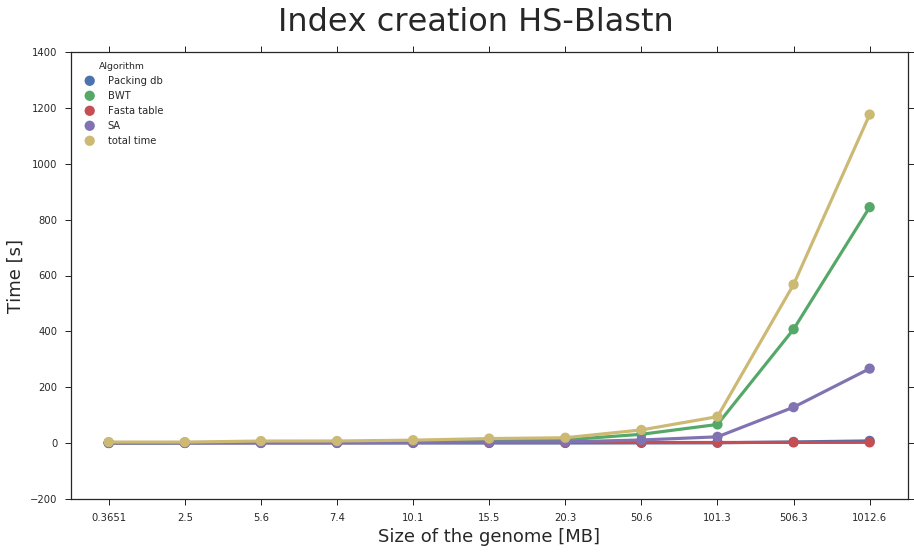

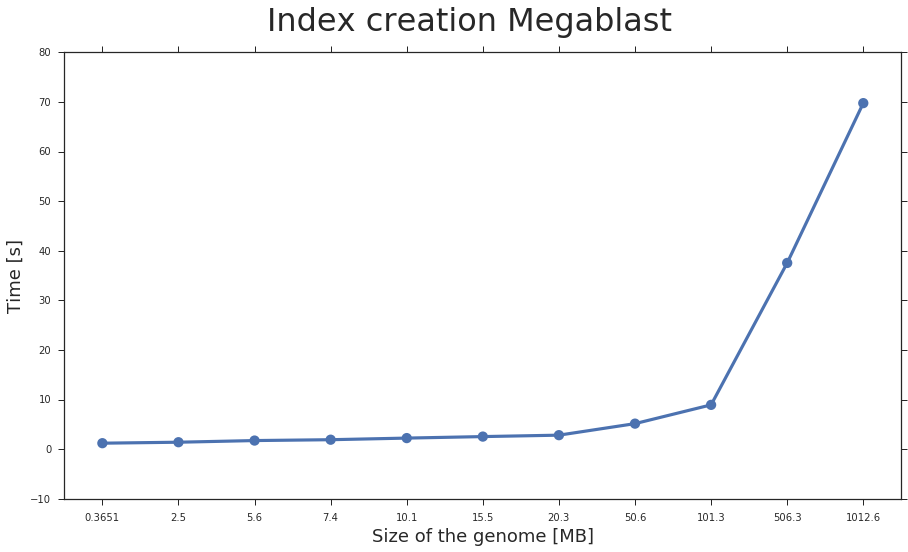

In [218]:
algorithm = hsPivot[hsPivot['Algorithm']!="size"]

sns.set(font_scale=1.2)
sns.set(style="ticks")

plt.figure(figsize=(15,8))
sns.pointplot(x="MB", y="Time", hue="Algorithm", data=algorithm,size=30, aspect=2)
plt.ylabel('Time [s]', fontsize=18)
plt.xlabel('Size of the genome [MB]', fontsize=18)
plt.suptitle("Index creation HS-Blastn", fontsize = 32)\

plt.figure(figsize=(15,8))
sns.pointplot(x="MB seq size", y="Time", data=mbIndexMeans,size=30, aspect=2)
plt.ylabel('Time [s]', fontsize=18)
plt.xlabel('Size of the genome [MB]', fontsize=18)
plt.suptitle("Index creation Megablast", fontsize = 32)

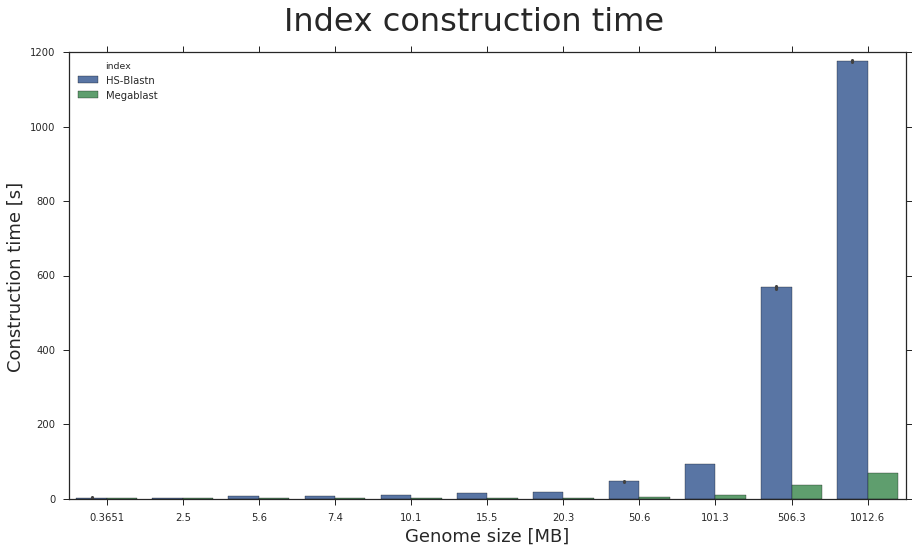

In [219]:
# Clean the columns we don't need
hs_blastn_index = hs_blastn_index.drop('SA', 1)
hs_blastn_index = hs_blastn_index.drop('BWT', 1)
hs_blastn_index = hs_blastn_index.drop('Packing db', 1)
hs_blastn_index = hs_blastn_index.drop('Fasta table', 1)
hs_blastn_index = hs_blastn_index.drop('id', 1)

mbIndexMeans['index']="Megablast"
hs_blastn_index['index']="HS-Blastn"

#combainedqIndex = mbIndexMeans
combainedqIndex = combainedqIndex.append(hs_blastn_index).append(mbIndexMeans)

plt.figure(figsize=(15,8))
sns.barplot(x="MB seq size", y="Time", hue="index", data=combainedqIndex)
plt.ylabel('Construction time [s]', fontsize=18)
plt.xlabel('Genome size [MB]', fontsize=18)
plt.suptitle("Index construction time", fontsize = 32)

# Single query with multiple threads HS-Blastn

All queries in this section are extracted from the original sequance as a substring. For this task I have written a C++ script.

In this section <b>increasing the thread count didn't speed up the query time</b> of the HS-Blastn algorithm. The algorithm uses additional threads to parallelize multiple queries (that are found in the same fasta file listed as the -query argument). This can be seen in the next sections where the same dataset is used but with multiple queries.

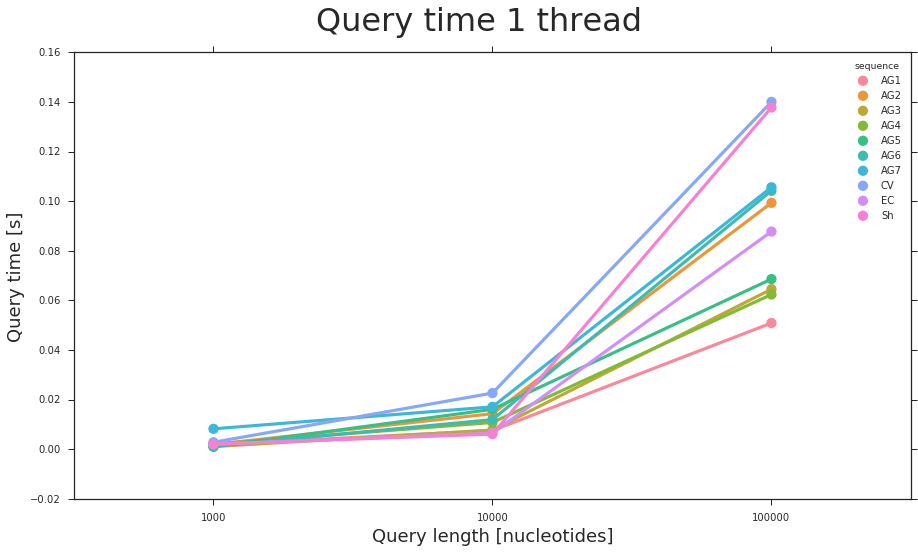

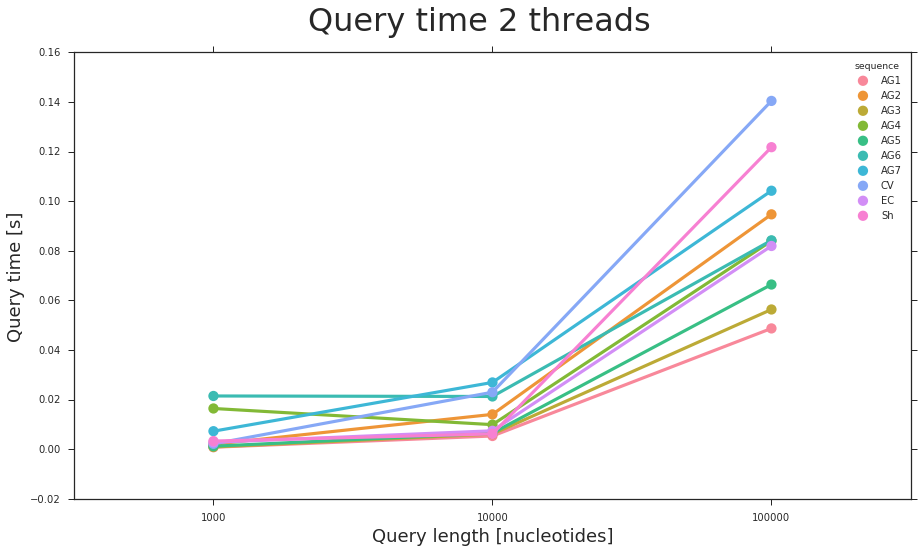

In [220]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread1,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread2,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 2 threads", fontsize = 32)

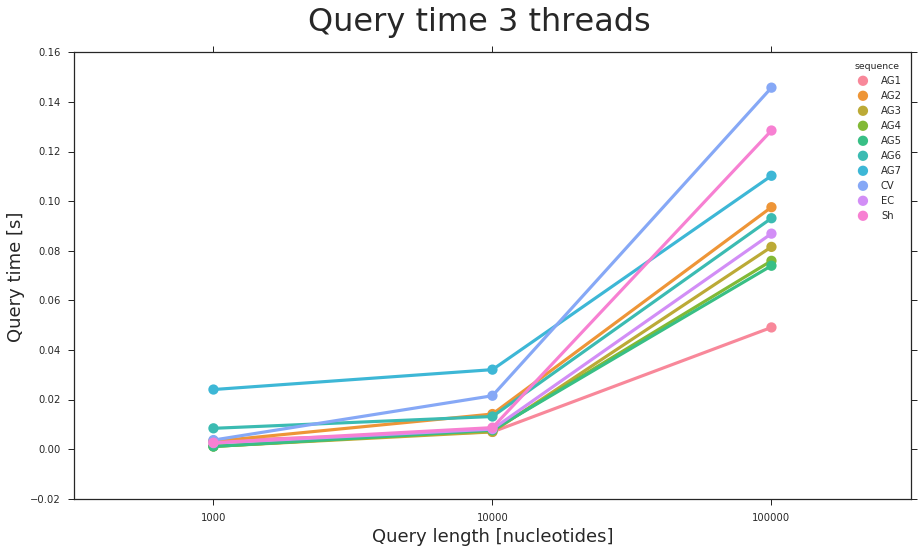

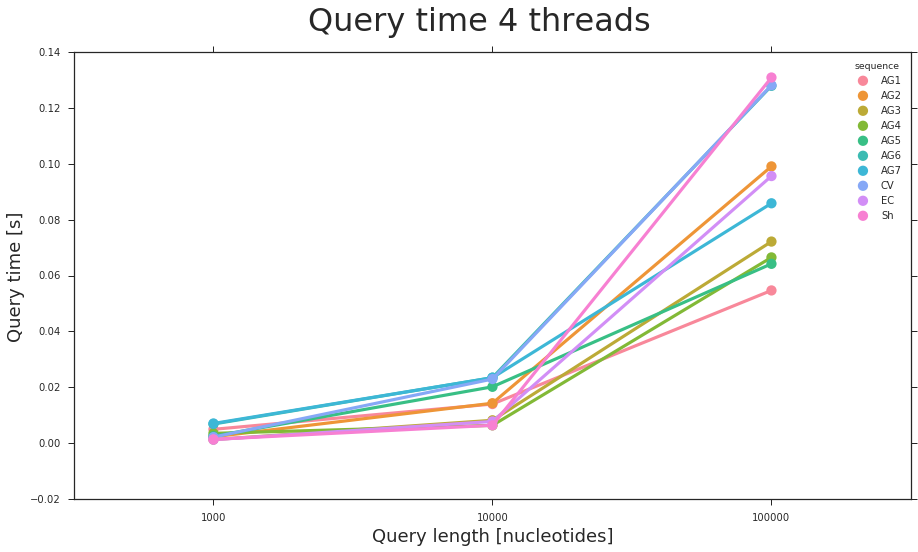

In [221]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread3,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 3 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread4,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 4 threads", fontsize = 32)

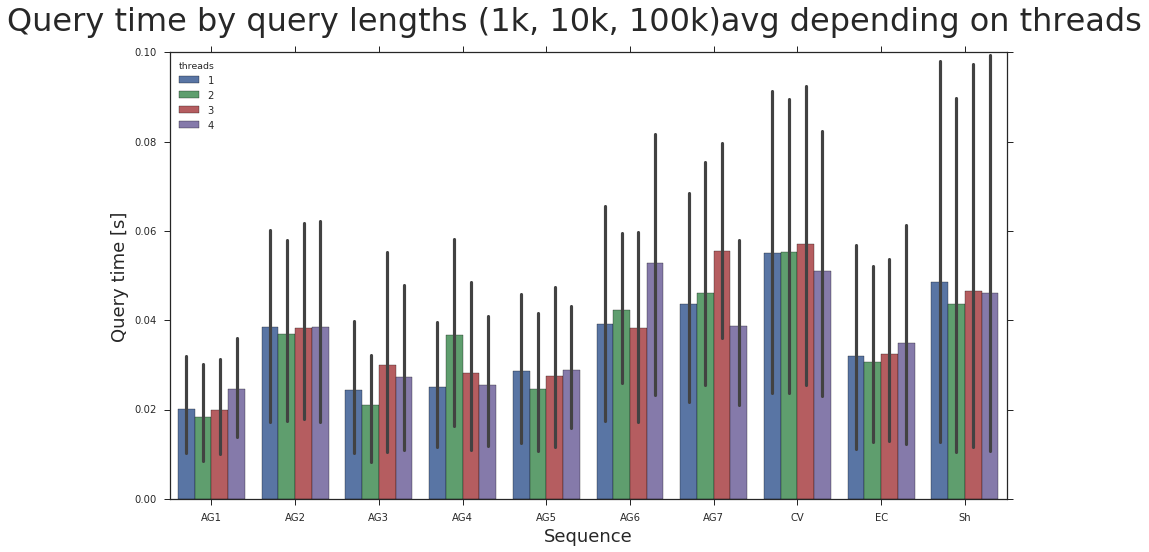

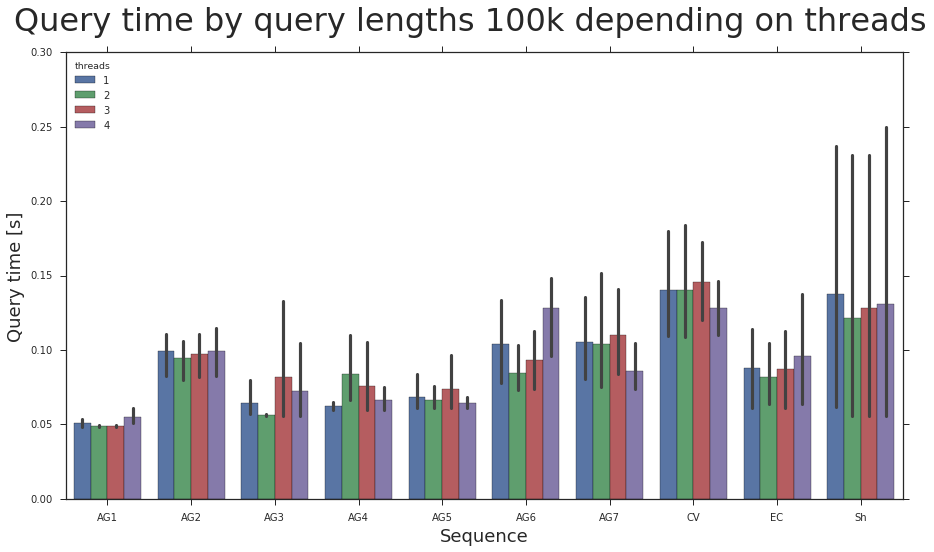

In [222]:
hsThread1['threads']=1
hsThread2['threads']=2
hsThread3['threads']=3
hsThread4['threads']=4
combainedqHS = hsThread1
combainedqHS = combainedqHS.append(hsThread2).append(hsThread3).append(hsThread4)

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedqHS)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("Query time by query lengths (1k, 10k, 100k)avg depending on threads", fontsize = 32)

filter100k = combainedqHS[combainedqHS['query length']==100000]
plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=filter100k)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("Query time by query lengths 100k depending on threads", fontsize = 32)

# Database loading time with multiple threads hs-blastn

The preprocessing time is the time that takes the algorithm to load the index from the hard disk to RAM memory. <b>Thread count doesn't effect loading time</b> as it uses only on thread to load the index in the he memory.

<b>Query length shouldn't effect query length</b> (in the graph the time is increased slightly by query sequence length) , one solution might be if HS-Blastn indexes the query too (like Blast).

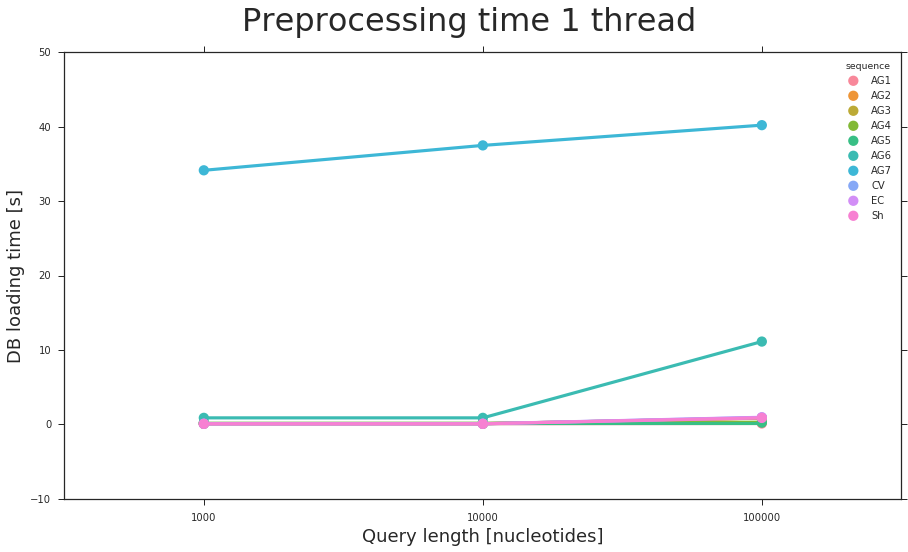

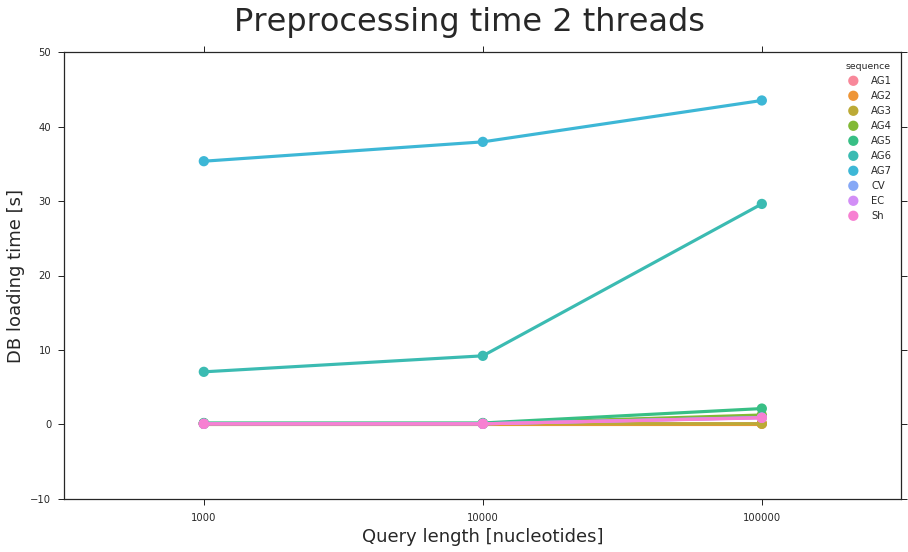

In [223]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread1,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread2,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 2 threads", fontsize = 32)

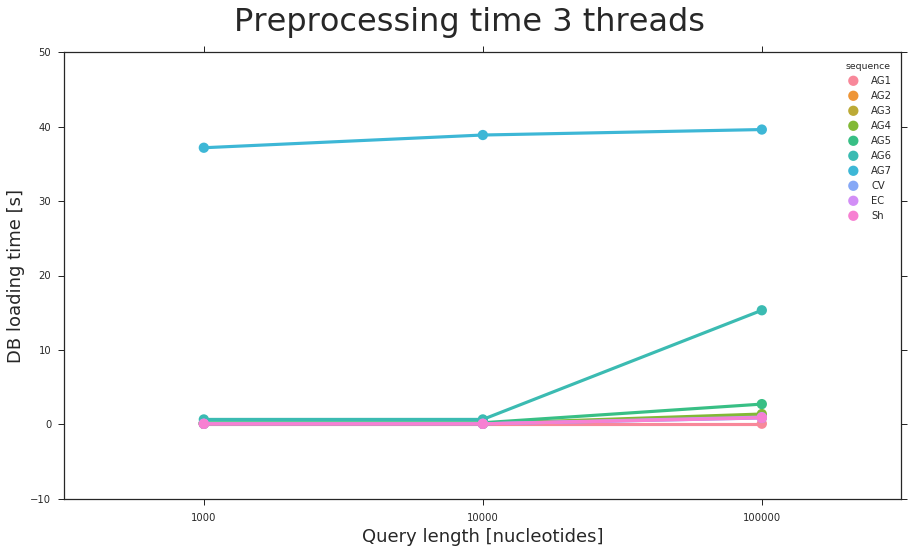

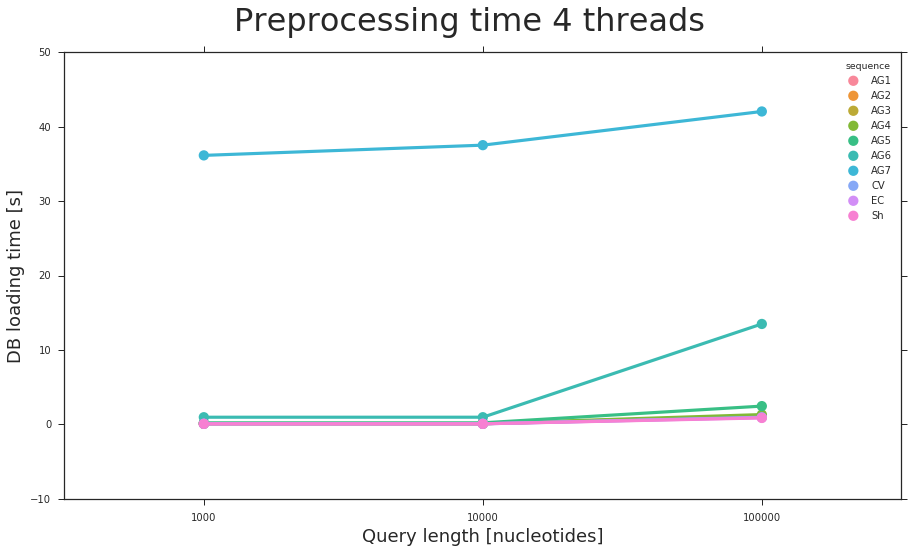

In [224]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread3,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 3 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread4,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 4 threads", fontsize = 32)

# Total time with multiple threads HS-Blastn

Total time is calculated as preprocessing time plus query time. <b>Total time in this section is mostly made from preprocessed time</b> as the query lengths are small sparse (single query per file).

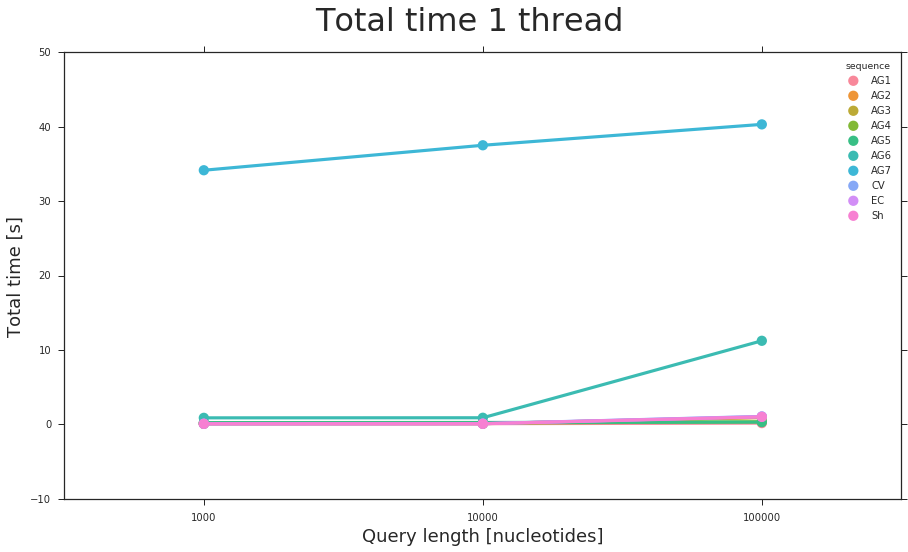

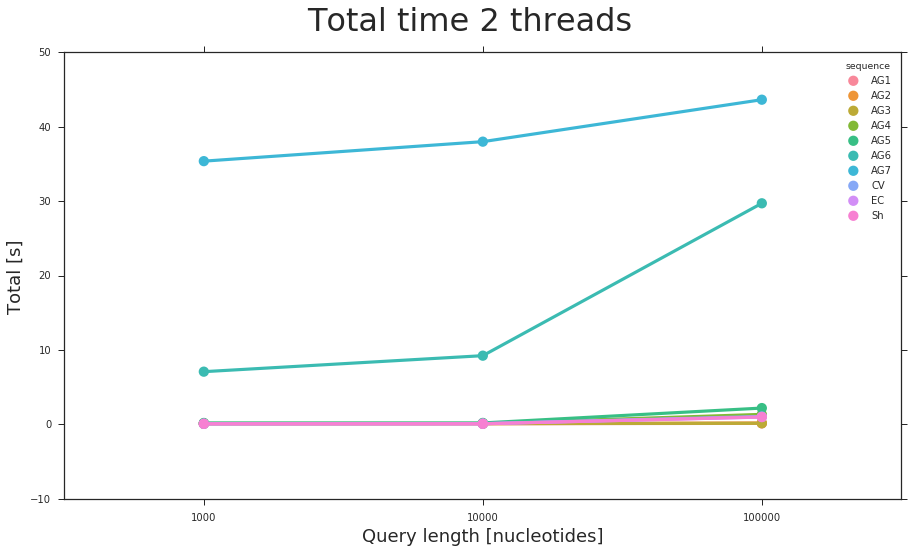

In [225]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread1,size=30, aspect=2)
plt.ylabel('Total time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread2,size=30, aspect=2)
plt.ylabel('Total [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 2 threads", fontsize = 32)

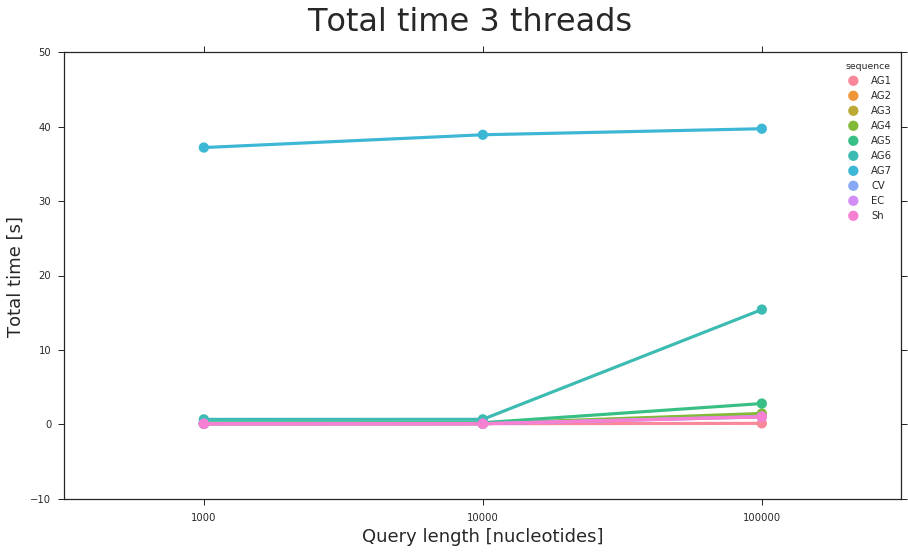

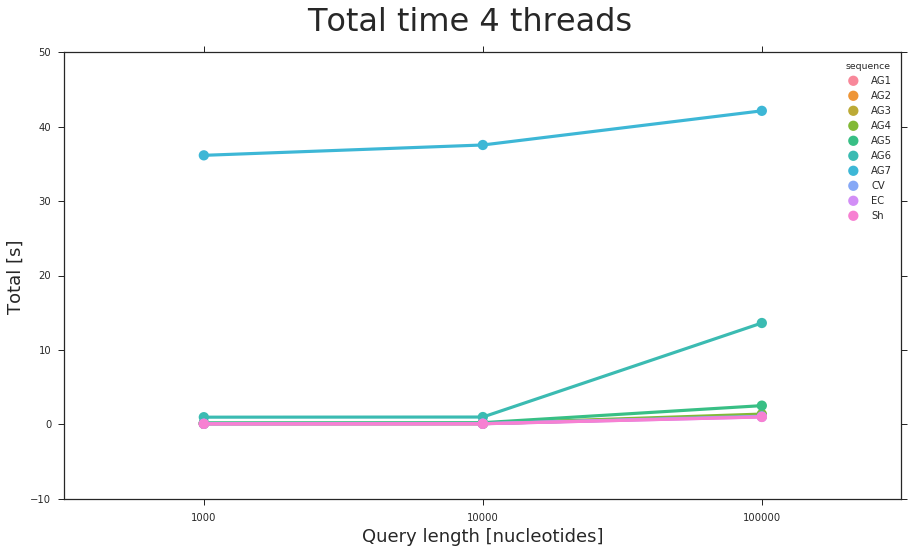

In [226]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread3,size=30, aspect=2)
plt.ylabel('Total time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 3 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread4,size=30, aspect=2)
plt.ylabel('Total [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 4 threads", fontsize = 32)

# HS-Blastn using 100 escherichia coli strains

The database in the section is a <b>collection of 100 strains</b> of escherichia coli (complete genomes) found on the NCBI website. The idea behind this test is to test the algorithm on real genome collections, thus using strains as queries.

To get the speed <b>difference using multiple threads</b> the collections is queried with 1 and with 2 e. coli gnomes strains.

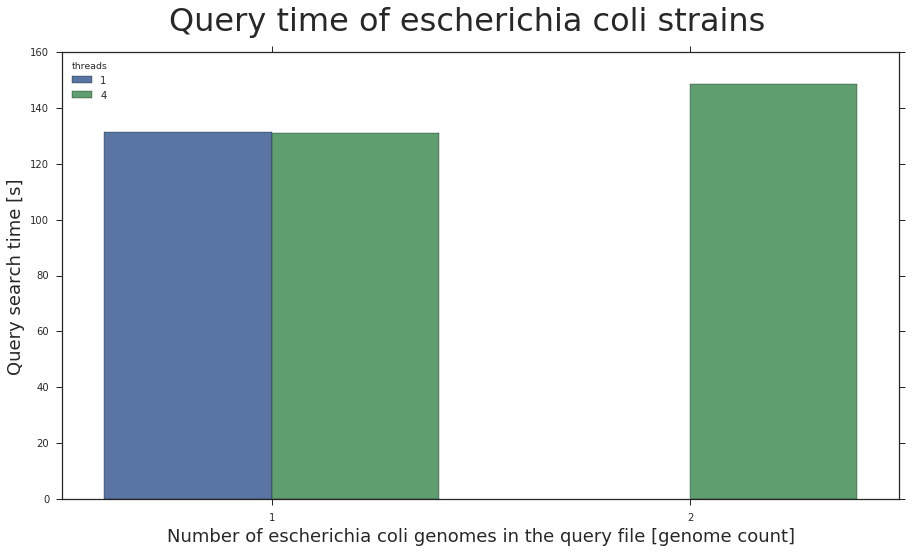

In [227]:
plt.figure(figsize=(15,8))
sns.barplot(x="query count", y="search time", hue="threads", data=strainMeans)
plt.ylabel('Query search time [s]', fontsize=18)
plt.xlabel('Number of escherichia coli genomes in the query file [genome count]', fontsize=18)
plt.suptitle("Query time of escherichia coli strains", fontsize = 32)

# Comparsion for multiple queries (single file) with multiple threads (HS-Blastn and Megablast)

Using multiple threads in this section <b>decreases the query time</b> since the query file has multiple queries (5 or 25).

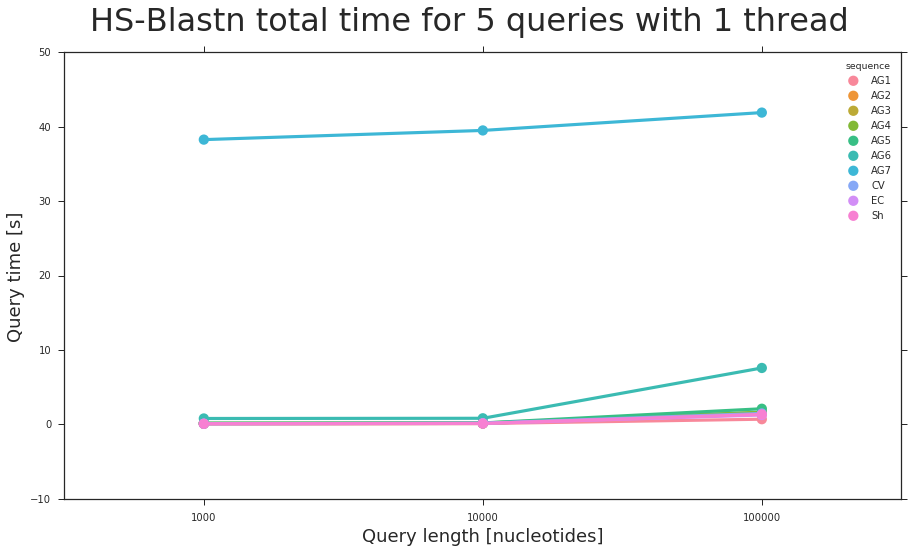

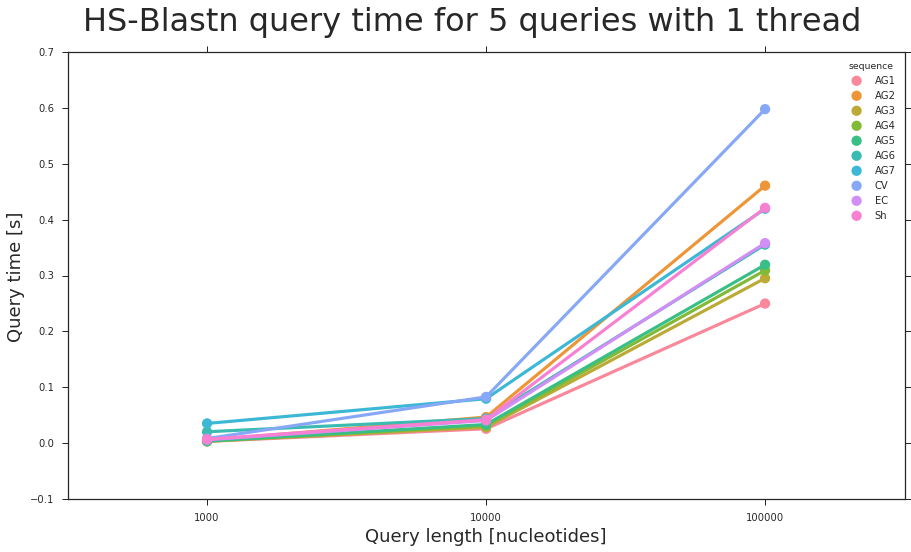

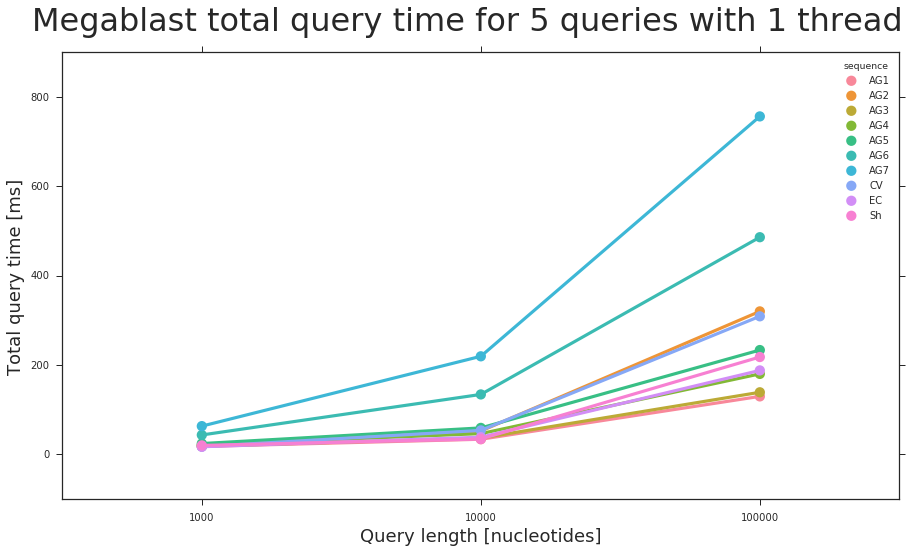

In [228]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=multiQ_q5_t1_means,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("HS-Blastn total time for 5 queries with 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=multiQ_q5_t1_means,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("HS-Blastn query time for 5 queries with 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=mb_q5_t1_means,size=30, aspect=2)
plt.ylabel('Total query time [ms]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Megablast total query time for 5 queries with 1 thread", fontsize = 32)

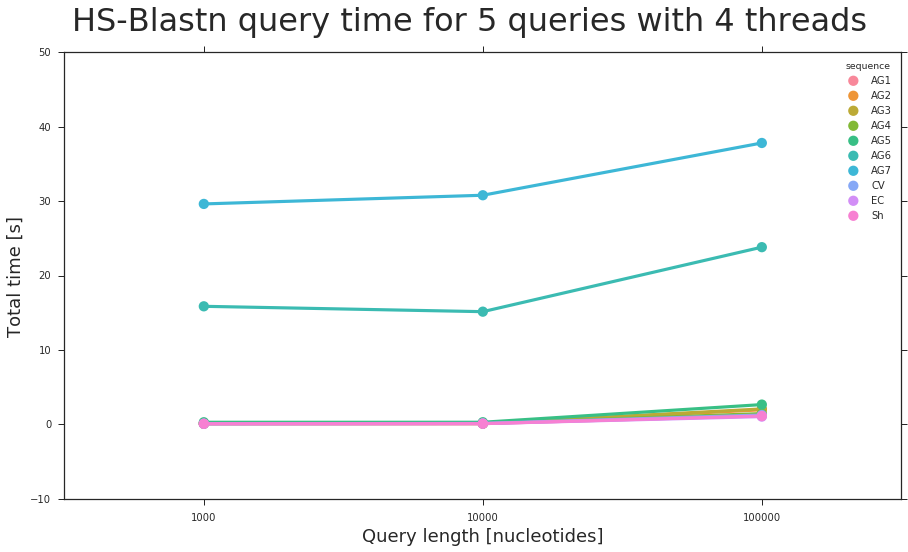

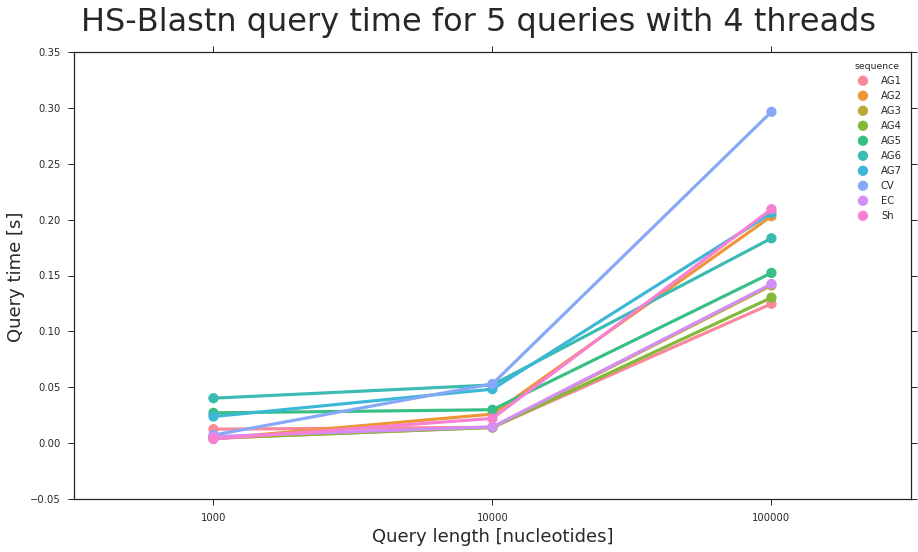

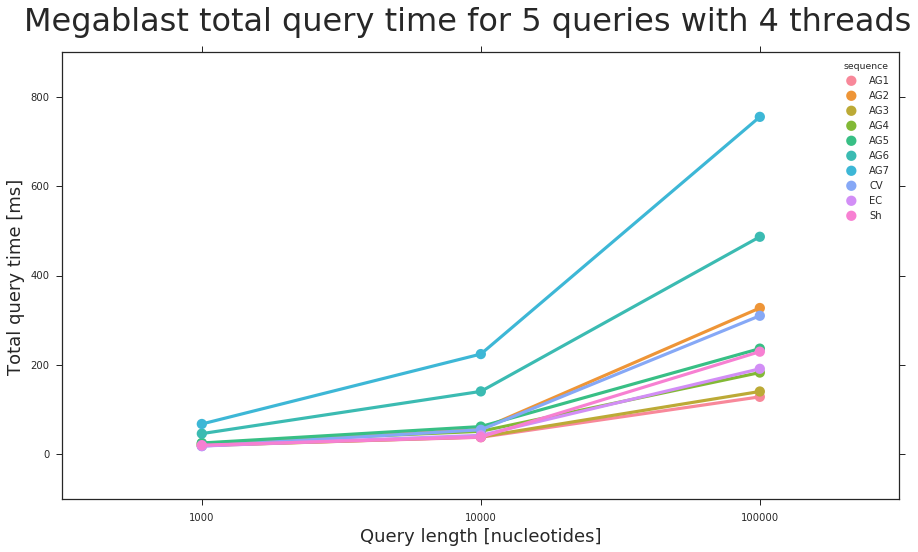

In [229]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=multiQ_q5_t4_means,size=30, aspect=2)
plt.ylabel('Total time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("HS-Blastn query time for 5 queries with 4 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=multiQ_q5_t4_means,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("HS-Blastn query time for 5 queries with 4 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=mb_q5_t4_means,size=30, aspect=2)
plt.ylabel('Total query time [ms]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Megablast total query time for 5 queries with 4 threads", fontsize = 32)

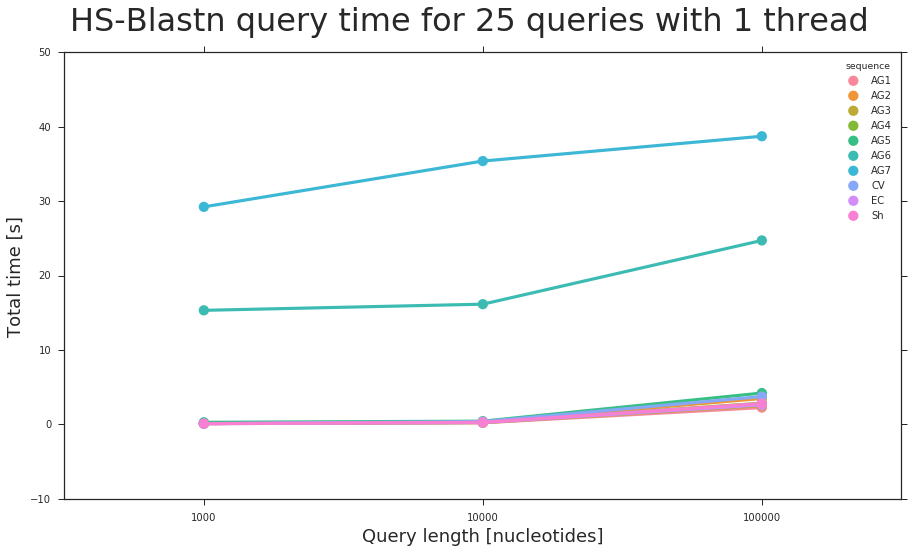

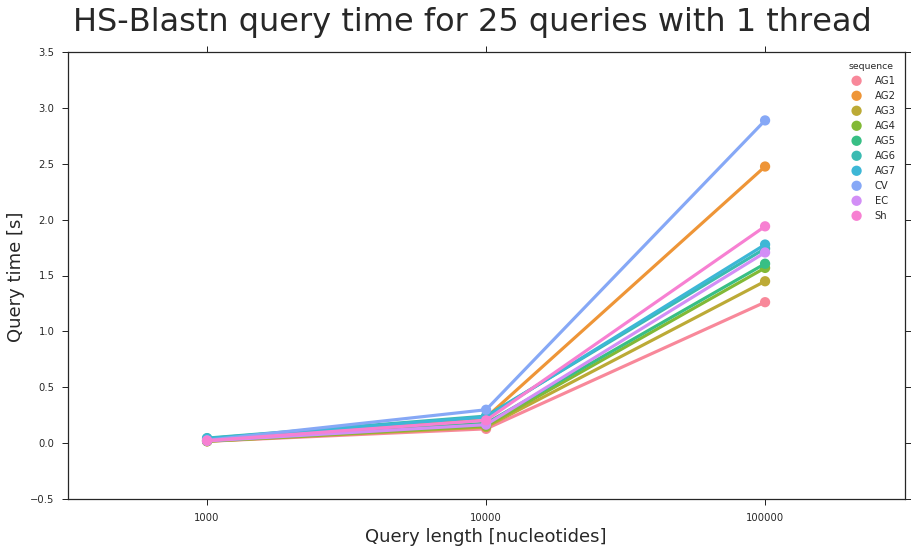

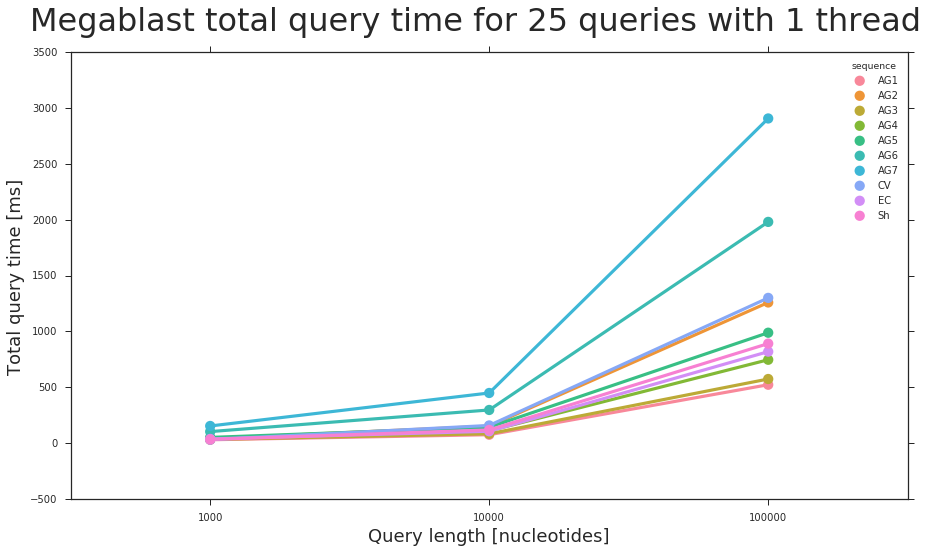

In [230]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=multiQ_q25_t1_means,size=30, aspect=2)
plt.ylabel('Total time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("HS-Blastn query time for 25 queries with 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=multiQ_q25_t1_means,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("HS-Blastn query time for 25 queries with 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=mb_q25_t1_means,size=30, aspect=2)
plt.ylabel('Total query time [ms]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Megablast total query time for 25 queries with 1 thread", fontsize = 32)

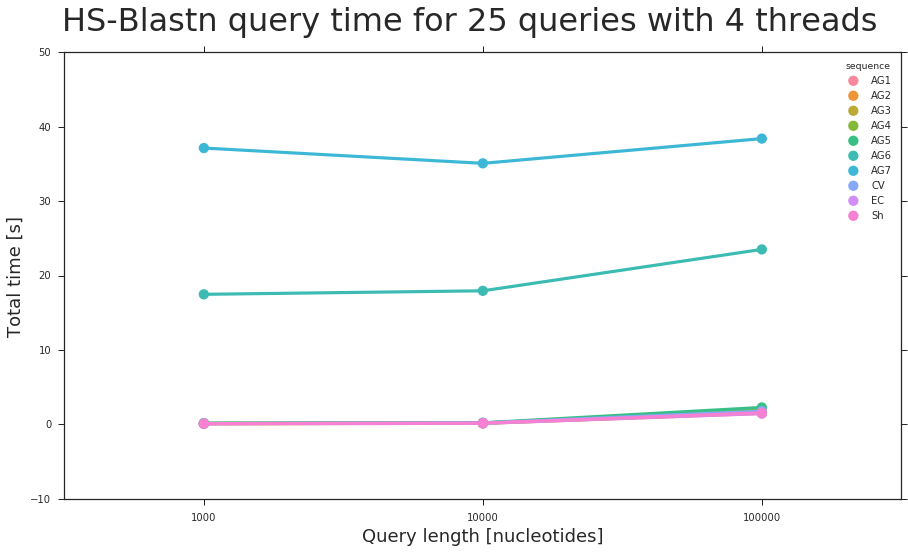

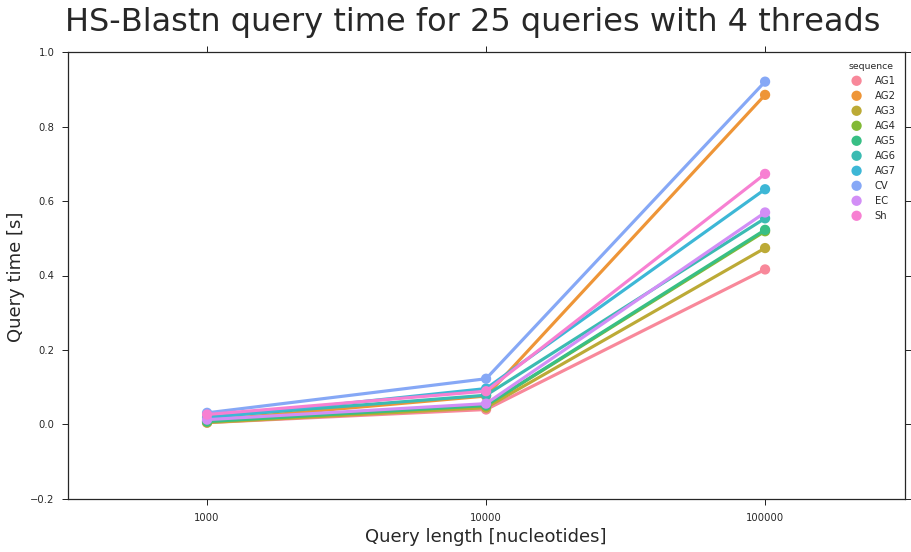

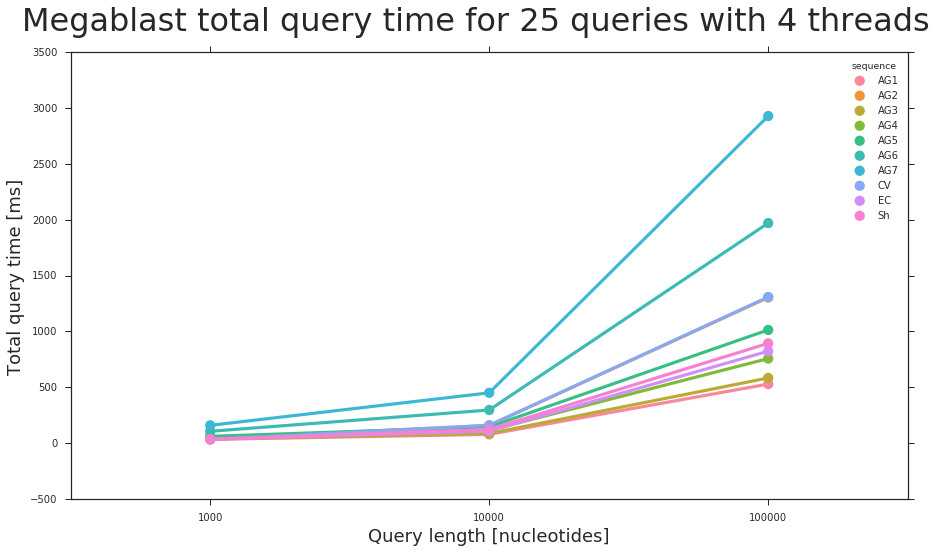

In [231]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=multiQ_q25_t4_means,size=30, aspect=2)
plt.ylabel('Total time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("HS-Blastn query time for 25 queries with 4 threads", fontsize = 32)


plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=multiQ_q25_t4_means,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("HS-Blastn query time for 25 queries with 4 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=mb_q25_t4_means,size=30, aspect=2)
plt.ylabel('Total query time [ms]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Megablast total query time for 25 queries with 4 threads", fontsize = 32)

# HS-Blastn query times depending on query length and threads

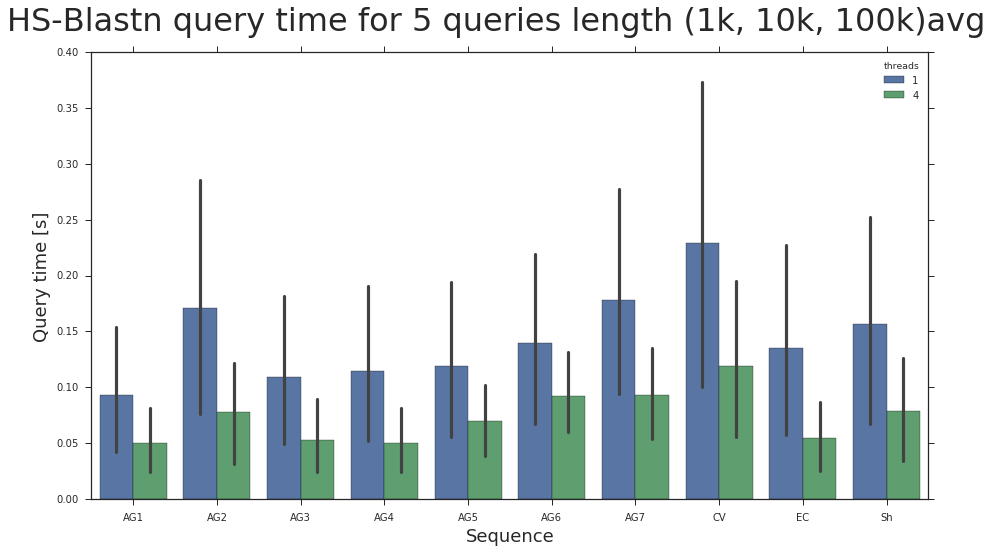

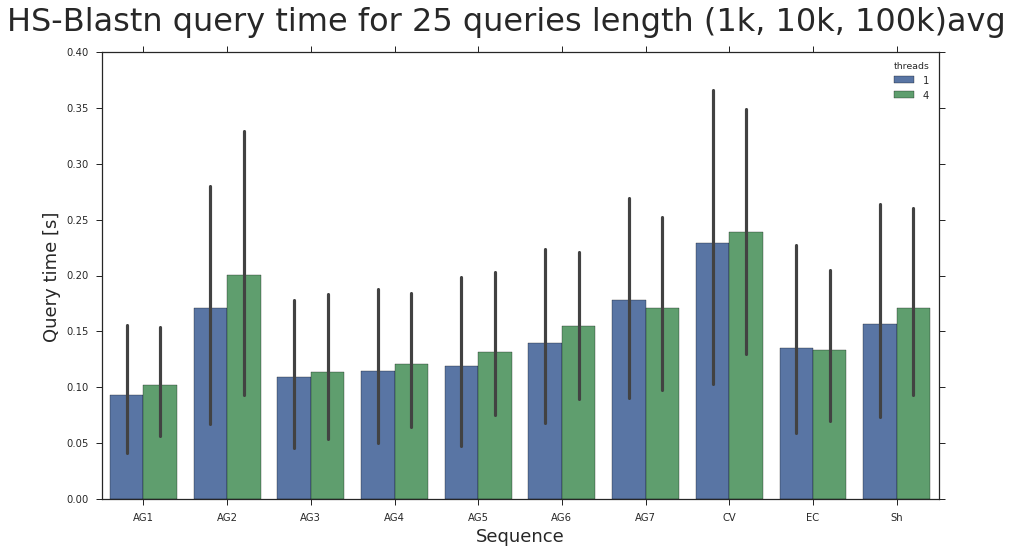

In [232]:
multiQ_q5_t1['threads']=1
multiQ_q5_t4['threads']=4
combainedq5 = multiQ_q5_t1
combainedq5 = combainedq5.append(multiQ_q5_t4)

multiQ_q25_t1['threads']=1
multiQ_q25_t4['threads']=4
combainedq25 = multiQ_q25_t1
combainedq25 = combainedq5.append(multiQ_q25_t4)

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq5)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("HS-Blastn query time for 5 queries length (1k, 10k, 100k)avg", fontsize = 32)

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq25)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("HS-Blastn query time for 25 queries length (1k, 10k, 100k)avg", fontsize = 32)

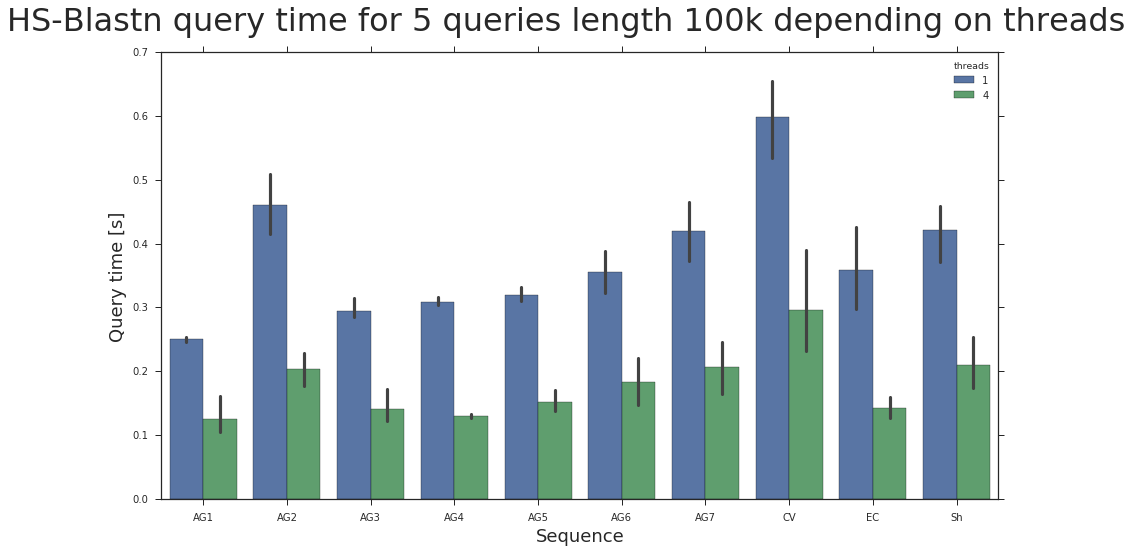

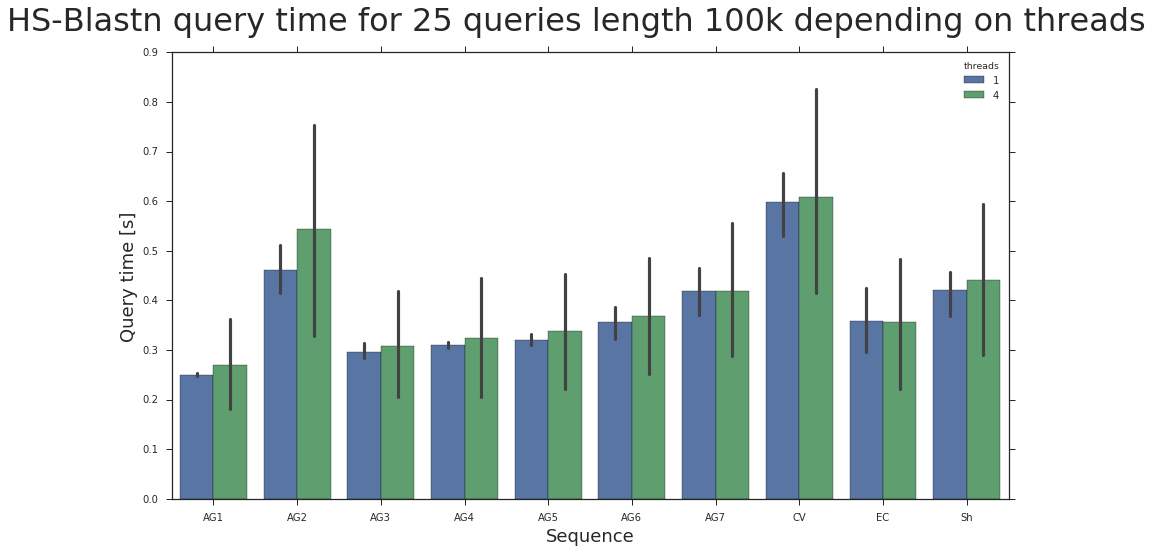

In [233]:
multiQ_q5_t1['threads']=1
multiQ_q5_t4['threads']=4
combainedq5 = multiQ_q5_t1
combainedq5 = combainedq5.append(multiQ_q5_t4)

multiQ_q25_t1['threads']=1
multiQ_q25_t4['threads']=4
combainedq25 = multiQ_q25_t1
combainedq25 = combainedq5.append(multiQ_q25_t4)

# Filter for a fixed query length 
combainedq25 = combainedq25[combainedq25['query length']==100000]
combainedq5 = combainedq5[combainedq5['query length']==100000]

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq5)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("HS-Blastn query time for 5 queries length 100k depending on threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq25)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("HS-Blastn query time for 25 queries length 100k depending on threads", fontsize = 32)

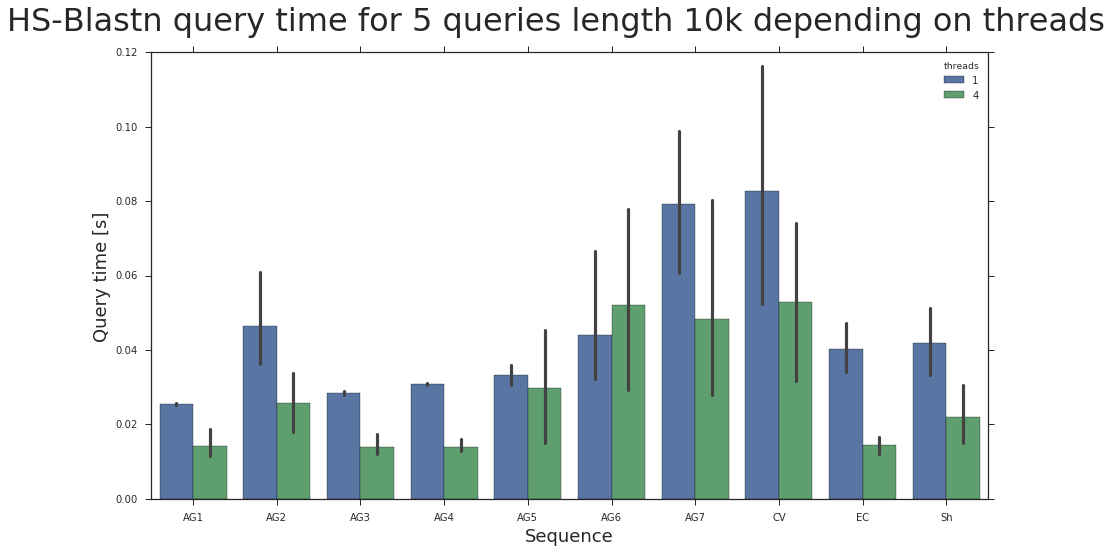

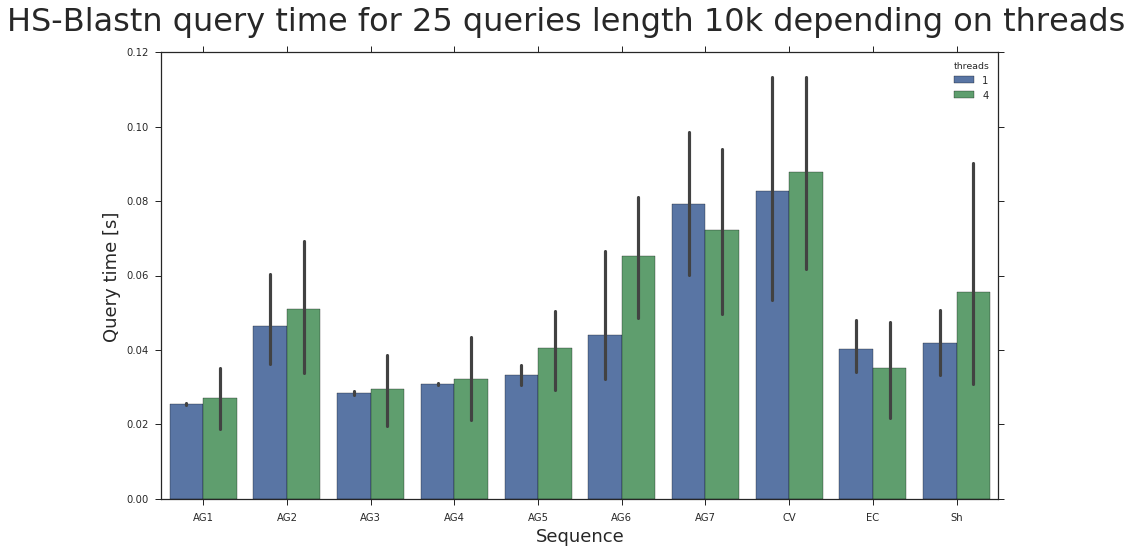

In [234]:
multiQ_q5_t1['threads']=1
multiQ_q5_t4['threads']=4
combainedq5 = multiQ_q5_t1
combainedq5 = combainedq5.append(multiQ_q5_t4)

multiQ_q25_t1['threads']=1
multiQ_q25_t4['threads']=4
combainedq25 = multiQ_q25_t1
combainedq25 = combainedq5.append(multiQ_q25_t4)

# Filter for a fixed query length 
combainedq25 = combainedq25[combainedq25['query length']==10000]
combainedq5 = combainedq5[combainedq5['query length']==10000]

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq5)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("HS-Blastn query time for 5 queries length 10k depending on threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq25)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("HS-Blastn query time for 25 queries length 10k depending on threads", fontsize = 32)

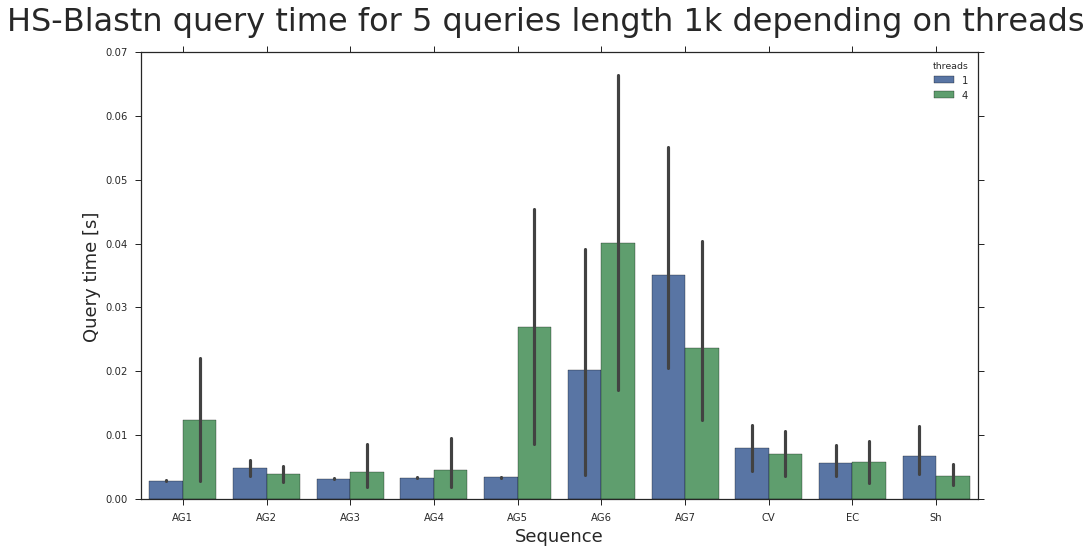

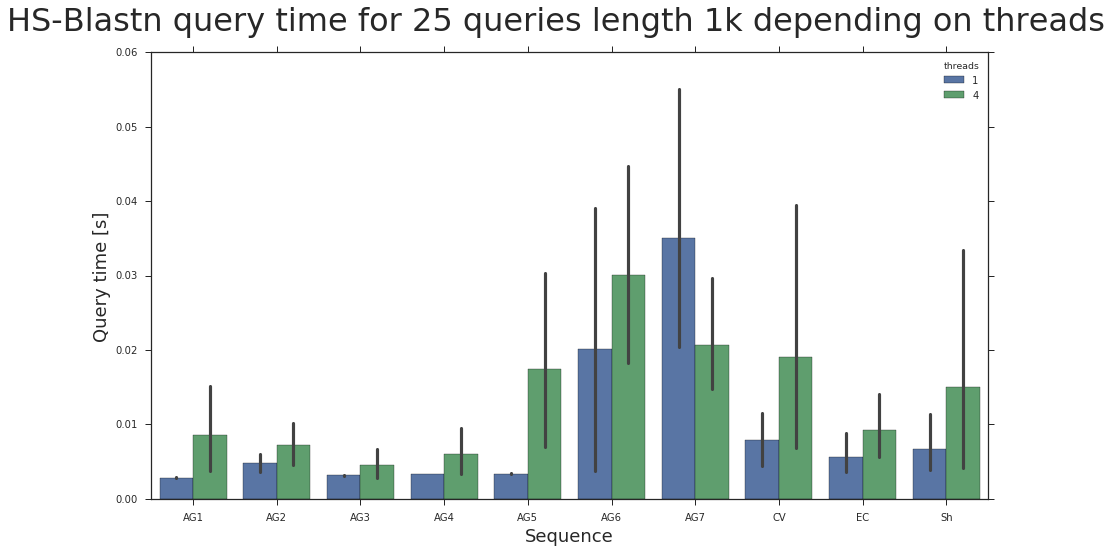

In [235]:
multiQ_q5_t1['threads']=1
multiQ_q5_t4['threads']=4
combainedq5 = multiQ_q5_t1
combainedq5 = combainedq5.append(multiQ_q5_t4)

multiQ_q25_t1['threads']=1
multiQ_q25_t4['threads']=4
combainedq25 = multiQ_q25_t1
combainedq25 = combainedq5.append(multiQ_q25_t4)

# Filter for a fixed query length 
combainedq25 = combainedq25[combainedq25['query length']==1000]
combainedq5 = combainedq5[combainedq5['query length']==1000]

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq5)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("HS-Blastn query time for 5 queries length 1k depending on threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq25)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("HS-Blastn query time for 25 queries length 1k depending on threads", fontsize = 32)

# Megablast query times depending on query length and threads

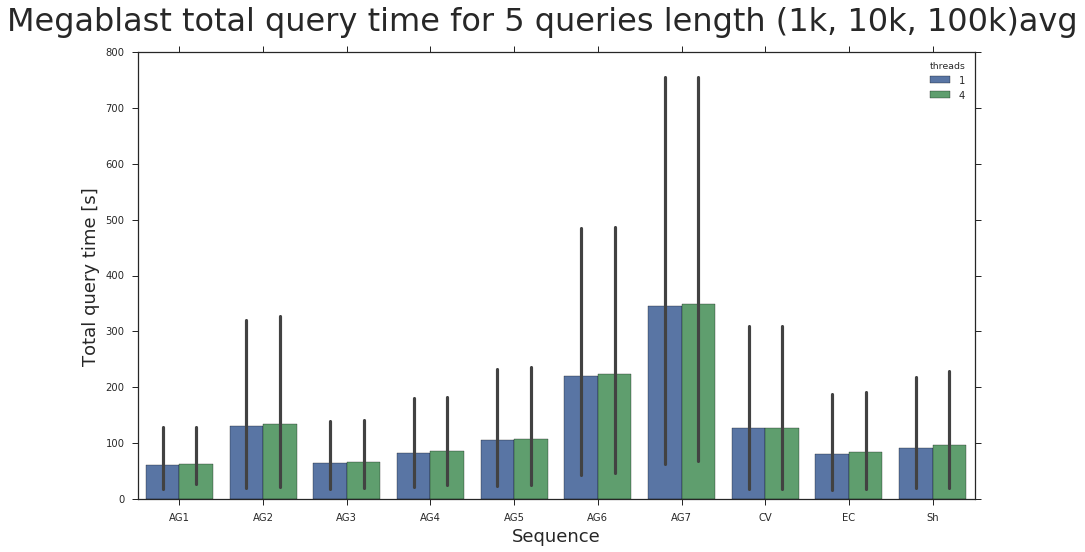

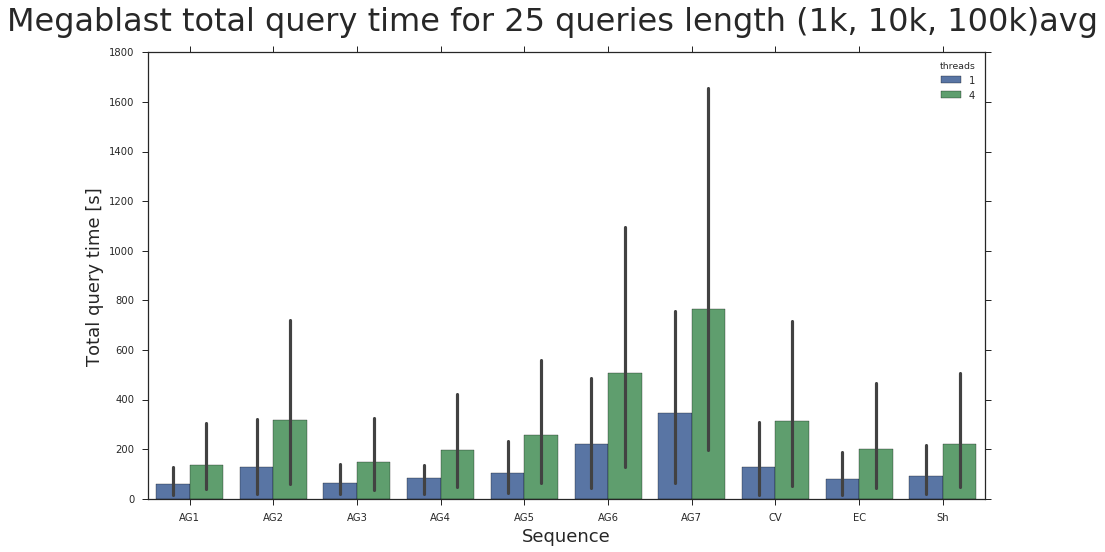

In [236]:
mb_q5_t1_means['threads']=1
mb_q5_t4_means['threads']=4
combainedq5 = mb_q5_t1_means
combainedq5 = combainedq5.append(mb_q5_t4_means)

mb_q25_t1_means['threads']=1
mb_q25_t4_means['threads']=4
combainedq25 = mb_q25_t1_means
combainedq25 = combainedq5.append(mb_q25_t4_means)

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq5)
plt.ylabel('Total query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("Megablast total query time for 5 queries length (1k, 10k, 100k)avg", fontsize = 32)

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq25)
plt.ylabel('Total query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("Megablast total query time for 25 queries length (1k, 10k, 100k)avg", fontsize = 32)

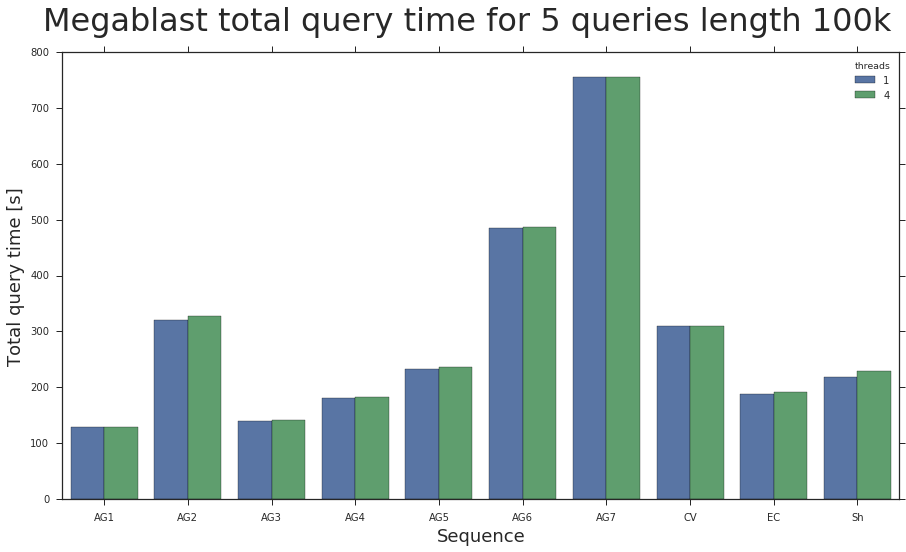

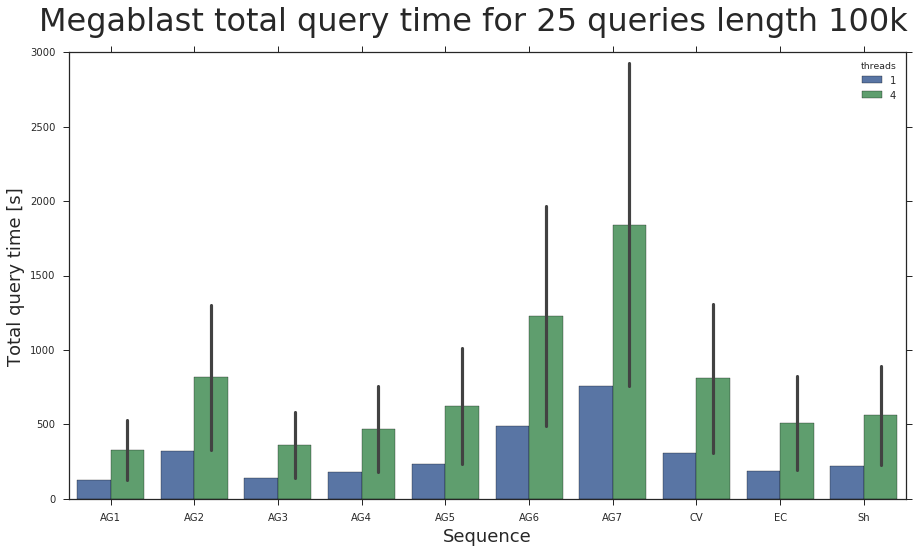

In [237]:
combainedq5_100k = combainedq5[combainedq5['query length']==100000]
combainedq25_100k = combainedq25[combainedq25['query length']==100000]

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq5_100k)
plt.ylabel('Total query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("Megablast total query time for 5 queries length 100k", fontsize = 32)

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq25_100k)
plt.ylabel('Total query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("Megablast total query time for 25 queries length 100k", fontsize = 32)

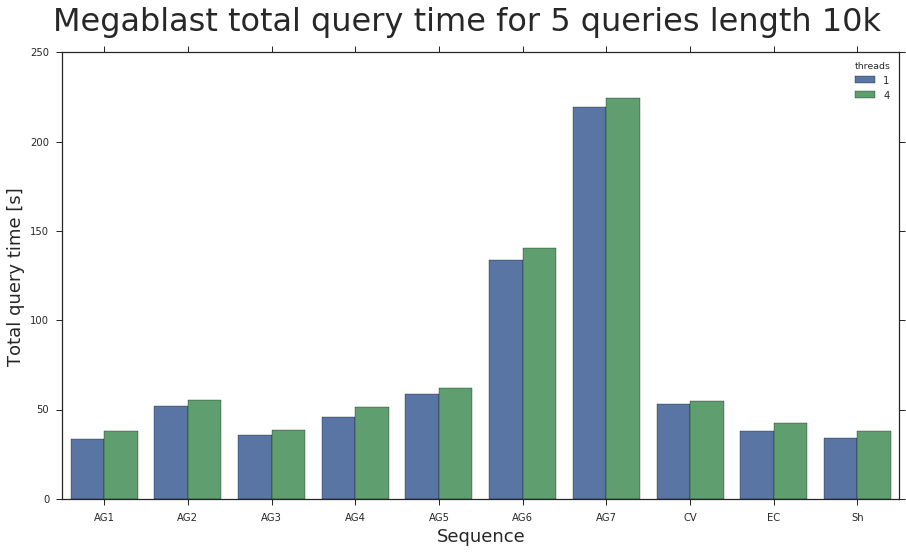

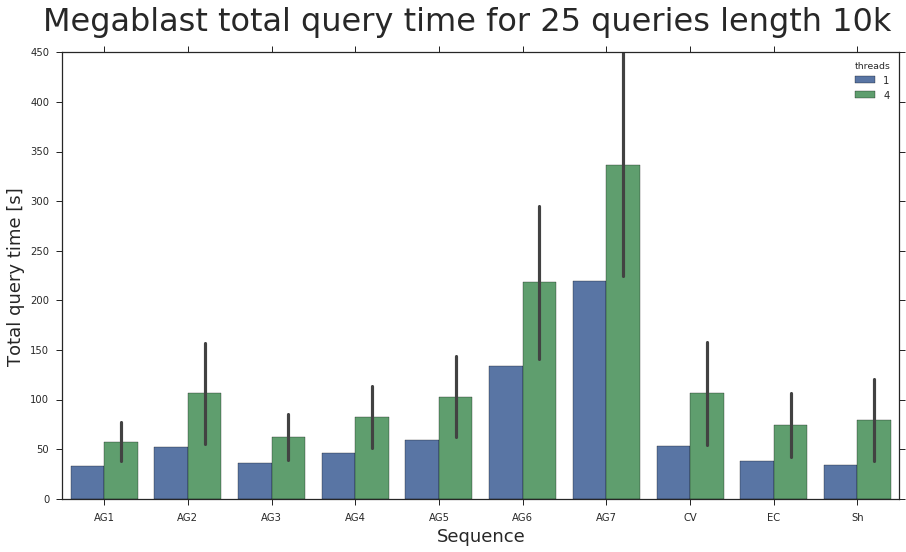

In [238]:
combainedq5_10k = combainedq5[combainedq5['query length']==10000]
combainedq25_10k = combainedq25[combainedq25['query length']==10000]

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq5_10k)
plt.ylabel('Total query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("Megablast total query time for 5 queries length 10k", fontsize = 32)

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq25_10k)
plt.ylabel('Total query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("Megablast total query time for 25 queries length 10k", fontsize = 32)

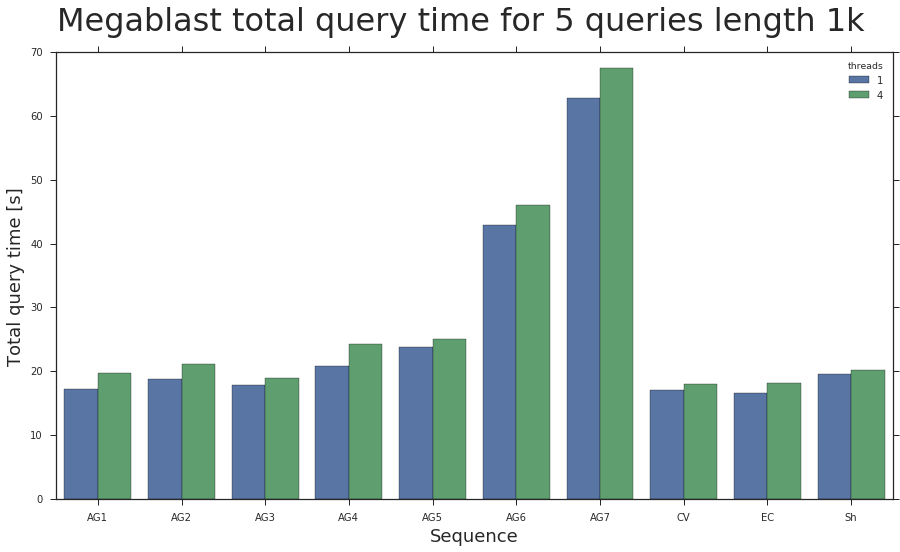

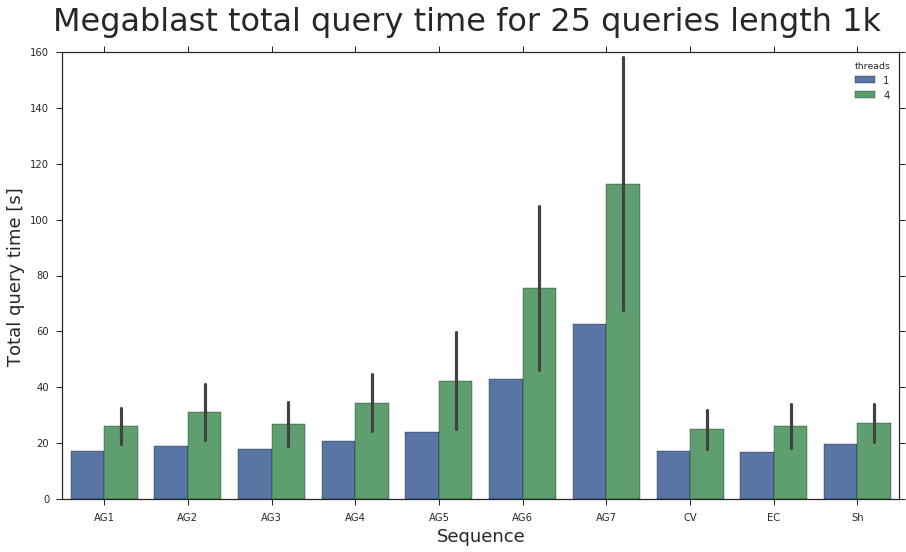

In [239]:
combainedq5_1k = combainedq5[combainedq5['query length']==1000]
combainedq25_1k = combainedq25[combainedq25['query length']==1000]

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq5_1k)
plt.ylabel('Total query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("Megablast total query time for 5 queries length 1k", fontsize = 32)

plt.figure(figsize=(15,8))
sns.barplot(x="sequence", y="query time", hue="threads", data=combainedq25_1k)
plt.ylabel('Total query time [s]', fontsize=18)
plt.xlabel('Sequence', fontsize=18)
plt.suptitle("Megablast total query time for 25 queries length 1k", fontsize = 32)